# Recherche et analyse des corrélations avec la variable cible

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/raw/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
# Définition des paramètres esthétiques généraux

%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

# Correlations avec les variables quantitatives

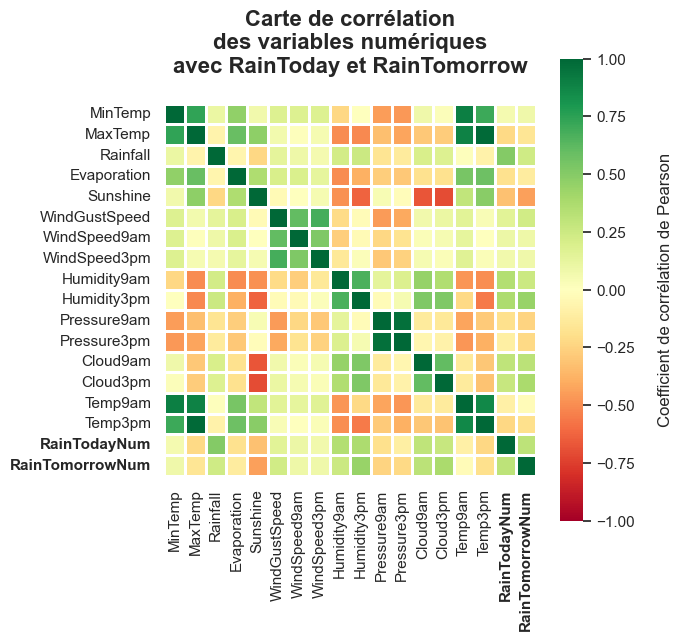

In [3]:
# OC, 26/10 : graphique pour rapport 1

# Suppression des nan de la variable cible et de RainToday
#df = df.dropna(subset = ['RainToday', 'RainTomorrow'])

# Transformation des 'Yes', 'No' en 1, 0:

RainTodayNum = df['RainToday'].apply(lambda row: 1 if row == 'Yes' else 0)
RainTomorrowNum = df['RainTomorrow'].apply(lambda row: 1 if row == 'Yes' else 0)

# Adjonction des nouvelles colonnes au df:

df['RainTodayNum'] = RainTodayNum
df['RainTomorrowNum'] = RainTomorrowNum

# Création d'un tableau de variables numériques:

num = df.select_dtypes(include = [float, int]).copy()

# Plot de la heatmap des corrélations

## Initialisation de la toile
fig, ax = plt.subplots(figsize = (6, 6))

## Traçage
sns.heatmap(num.corr(),
            square = True,
            linewidth = 1,
            vmin = -1,
            vmax = 1,
            cmap = "RdYlGn",
            cbar_kws = {"label": "\nCoefficient de corrélation de Pearson"})

## Mise en forme
plt.title("Carte de corrélation\ndes variables numériques\navec RainToday et RainTomorrow\n",
          fontweight = "bold",
          fontsize = 16)

# Mise en évidence de la variable cible `RainTomorrow`
ax.get_xticklabels()[-1].set_weight("bold")
ax.get_xticklabels()[-2].set_weight("bold")
ax.get_yticklabels()[-1].set_weight("bold")
ax.get_yticklabels()[-2].set_weight("bold")

plt.show()

In [4]:
num.isna().sum()

MinTemp             1485
MaxTemp             1261
Rainfall            3261
Evaporation        62790
Sunshine           69835
WindGustSpeed      10263
WindSpeed9am        1767
WindSpeed3pm        3062
Humidity9am         2654
Humidity3pm         4507
Pressure9am        15065
Pressure3pm        15028
Cloud9am           55888
Cloud3pm           59358
Temp9am             1767
Temp3pm             3609
RainTodayNum           0
RainTomorrowNum        0
dtype: int64

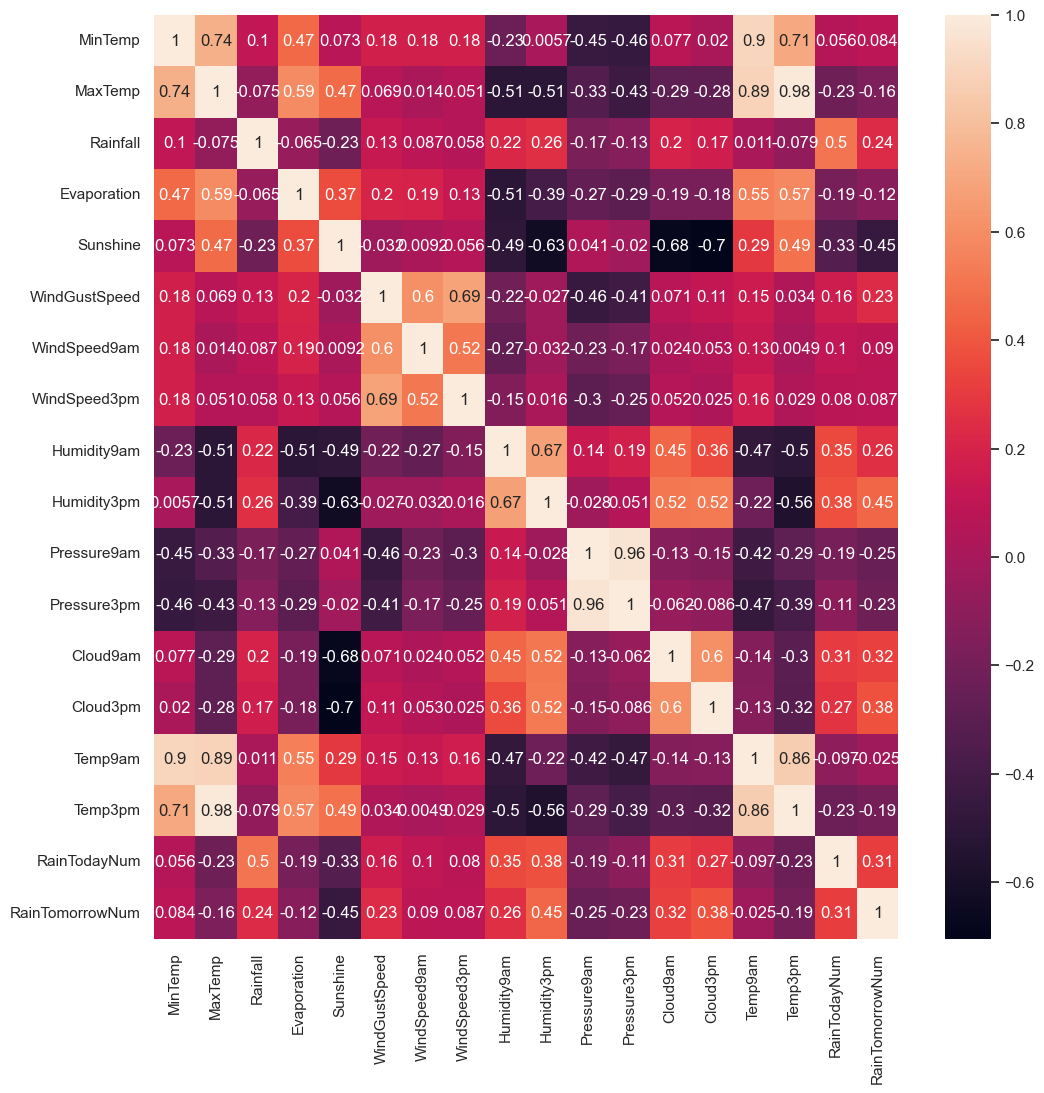

In [5]:
# Suppression des nan de la variable cible et de RainToday
df = df.dropna(subset = ['RainToday', 'RainTomorrow'])

# Transformation des 'Yes', 'No' en 1, 0:

RainTodayNum = df['RainToday'].apply(lambda row: 1 if row == 'Yes' else 0)
RainTomorrowNum = df['RainTomorrow'].apply(lambda row: 1 if row == 'Yes' else 0)

# Adjonction des nouvelles colonnes au df:

df['RainTodayNum'] = RainTodayNum
df['RainTomorrowNum'] = RainTomorrowNum

# Création d'un tableau de variables numériques:

num = df.select_dtypes(include = [float, int]).copy()

# Plot de la heatmap des corrélations

plt.figure(figsize = (12, 12))
sns.heatmap(num.corr(), annot = True)
plt.show()

Bilan: que des corrélations faibles (<0.5) avec `RainTomorrow`:
* Premier jeu de variables numériques correlées avec la cible (entre 0.45 et 0.31):
    1. Humidity3pm : 0.45
    2. Cloud3pm :0.38
    3. Cloud9am : 0.32
    4. RainTodayNum : 0.31
    5. Sunshine : -0.45
    
Ces 5 variables sont plutôt correlées entre elles.  On y retrouve notamment la variable 'Sunshine' avec la plus forte corrélation. 
Il va falloir choisir une stratégie de gestion des nan sur cette variable.

* Deuxième jeu de variables numériques correlées avec la cible (entre 0.3 et 0.2):
    1. Humidity9am : 0.31
    2. Rainfall : 0.24
    3. WindGustSpeed : 0.23
    4. Pressure3pm : -0.23
    5. Pressure9am : -0.25
    
Ces 5 variables sont peu correlées entre elles, sauf Pressure9am et Pressure3pm très correlées (0.96), elles même corellées à WindGustSpeed (-0.46 et -0.41).  
Là aussi, on retrouve uen variable qui nécéssite des investigations supplémentaires au niveau de la gestion des nan: Rainfall.


# Correlation avec les variables qualitatives

In [6]:
# Création d'une copie de df contenant toutes les variables qualitatives:

cat = df.select_dtypes(include = object).copy()
cat.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [7]:
# Fonction réalisant un test de Chi-2 entre une varaible qualitative et la variable cible:

from scipy.stats import chi2_contingency

def corel_cat(mesure):
    cross_table = pd.crosstab(cat[mesure], df['RainTomorrow'])
    return print("Variable:", mesure, "\n",
        "La statistique du test est:", round(chi2_contingency(cross_table).statistic), "." ,"\n",
        "La p-value du test est:", round(chi2_contingency(cross_table).pvalue, 4), ".", "\n",
        "---------------------------------------------------------------------------------------------------------")

In [8]:
# Exemple:
corel_cat('Location')

Variable: Location 
 La statistique du test est: 3563 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------


In [9]:
# Regardons les corrélations pour l'ensemble des variables catégorielles:

for col in cat.columns:
    corel_cat(col)

Variable: Date 
 La statistique du test est: 16735 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------
Variable: Location 
 La statistique du test est: 3563 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------
Variable: WindGustDir 
 La statistique du test est: 1517 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------
Variable: WindDir9am 
 La statistique du test est: 2178 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------
Variable: WindDir3pm 
 La statistique du test est: 1283 . 
 La p-value du test est: 0.0 . 
 ---------------------------------------------------------------------------------------------------------
Variable: RainTo

Bilan: tout est corrélé, mais reste à interpréter la valeur de la statistique du test pour mesurer la force de la corrélation.